This jupyter notebook licensed with CC-BY-NC. See https://gitlab.com/awsteiner/ugastro_ipynb/blob/master/LICENSE.md for details.

Initializations:

In [1]:
from math import *
import numpy
import matplotlib.pyplot as plot

We need to define two functions which convert wavelength 
or temperature to RGB color. Students can skip these. 

In [2]:
def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    #R *= 255
    #G *= 255
    #B *= 255
    #return (int(R), int(G), int(B))
    return(R,G,B)

In [3]:
def convert_K_to_RGB(colour_temperature):
    """
    Converts from K to RGB, algorithm courtesy of 
    http://www.tannerhelland.com/4435/convert-temperature-rgb-algorithm-code/
    and taken from https://gist.github.com/petrklus/b1f427accdf7438606a6 .
    Works from 1000 K to 40000 K
    """
    #range check
    if colour_temperature < 1000: 
        colour_temperature = 1000
    elif colour_temperature > 40000:
        colour_temperature = 40000
    
    tmp_internal = colour_temperature / 100.0
    
    # red 
    if tmp_internal <= 66:
        red = 255
    else:
        tmp_red = 329.698727446 * pow(tmp_internal - 60, -0.1332047592)
        if tmp_red < 0:
            red = 0
        elif tmp_red > 255:
            red = 255
        else:
            red = tmp_red
    
    # green
    if tmp_internal <=66:
        tmp_green = 99.4708025861 * log(tmp_internal) - 161.1195681661
        if tmp_green < 0:
            green = 0
        elif tmp_green > 255:
            green = 255
        else:
            green = tmp_green
    else:
        tmp_green = 288.1221695283 * pow(tmp_internal - 60, -0.0755148492)
        if tmp_green < 0:
            green = 0
        elif tmp_green > 255:
            green = 255
        else:
            green = tmp_green
    
    # blue
    if tmp_internal >=66:
        blue = 255
    elif tmp_internal <= 19:
        blue = 0
    else:
        tmp_blue = 138.5177312231 * log(tmp_internal - 10) - 305.0447927307
        if tmp_blue < 0:
            blue = 0
        elif tmp_blue > 255:
            blue = 255
        else:
            blue = tmp_blue
    
    # AWS
    red=red/255.0
    green=green/255.0
    blue=blue/255.0
    
    return red, green, blue
    

# Section 1: Transitions in the Hydrogen atom

First we'll need the Rydberg constant in meters (SI units):

In [4]:
RH=1/9.116e-8

Then, using this Rydberg constant, the formula which describes the inverse wavelength of a transition from n2 to n1 is:

$$ \frac{1}{\lambda} = R_H \left( \frac{1}{n_1^2} - \frac{1}{n_2^2} \right) $$

These wavelengths have different names, depending on the value of n1. 
For n1=1, we get the Lyman series. The following line creates an array
which describes the Lyman series and then converts it to nanometers:

In [5]:
Lyman = [1/(RH*(1.0/1.0**2-1.0/n2**2))/1.0e-9 for n2 in range(2,7)]

In [6]:
print(Lyman)

[121.54666666666667, 102.55500000000002, 97.23733333333334, 94.95833333333334, 93.76457142857144]


We can plot the wavelengths:

Text(0.5, 0, '$ \\lambda~(\\mathrm{nm}) $')

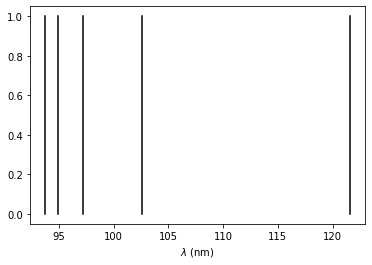

In [7]:
for i in range(0,len(Lyman)):
    plot.plot([Lyman[i],Lyman[i]],[0,1],color='black')
plot.xlabel('$ \lambda~(\mathrm{nm}) $')

<font color="red">Task 1: Make a small edit in the lines above in order to obtain
the sixth line in the Lyman sequence and put its wavelength (in nm) in the 
    line below</font>

In [8]:
# Answer:

## The Balmer series

The Balmer series, for n1=2, is in the visible spectrum, so we can show it's visual color, compare with https://en.wikipedia.org/wiki/Balmer_series#/media/File:Visible_spectrum_of_hydrogen.jpg

In [9]:
Balmer = [1/(RH*(1.0/2.0**2-1.0/i**2))/1.0e-9 for i in range(3,9)]

In [10]:
print(Balmer)

[656.3519999999999, 486.18666666666667, 434.09523809523813, 410.2200000000001, 397.0524444444444, 388.94933333333336]


We can plot these wavelengths and color them by their real colors:

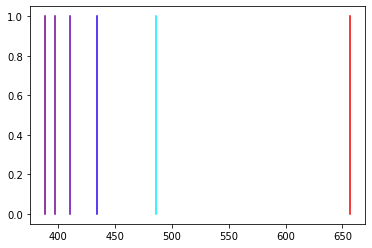

In [11]:
for i in range(0,len(Balmer)):
    plot.plot([Balmer[i],Balmer[i]],[0,1],color=(wavelength_to_rgb(Balmer[i])))

<font color="red">Task 2: Edit the line below (remove the number 55 and replace it with the correct Python function) to print out the 
    numerical values for the Paschen series, for n1=3, in nm:</font>

In [12]:
Paschen = [55 for i in range(4,10)]
print(Paschen)

[55, 55, 55, 55, 55, 55]


# Section 2: The Maxwell-Boltzmann distribution:

In [13]:
# Maxwell-Boltzmann distribution

$$ F(v) dv = 4 \pi \left( \frac{m}{2 \pi k_B T} \right) v^2 \exp \left( - \frac{m v^2}{2 k_B T} \right) dv $$

In [14]:
# mass of O2 in kg

In [15]:
mO2=2*16*1.66054e-27

In [16]:
# Room temperature (in Kelvin)

In [17]:
Troom=294

In [18]:
# Boltzmann constant (in Joules/Kelvin)

In [19]:
kB=1.38065e-23

In [20]:
# Mean velocity (in meters per second)

$$ \int v F(v) dv = \sqrt{\frac{8 k_B T}{\pi m}} $$

<font color="red">Task 3: use the quantities and formula above to compute the mean velocity of oxygen molecules in m/s in the cell below:</font>

In [21]:
vmean=1
print(vmean)

1


Plot the Maxwell-Boltzmann velocity distribution:

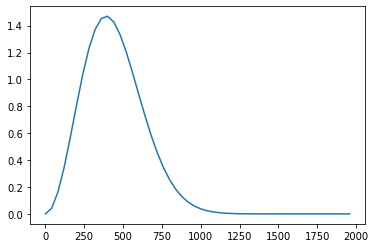

In [22]:
plot.plot([v for v in numpy.arange(0,2000,40)],
          [2*mO2/kB/Troom*v**2*exp(-mO2*v**2/2/kB/Troom) 
           for v in numpy.arange(0,2000,40)])
plot.show()

# Section 3: Blackbody spectra and the Sun

First, just plot a flat optical spectrum. Note that this isn't "real", as real objects always emit different numbers of photons at different energies. 

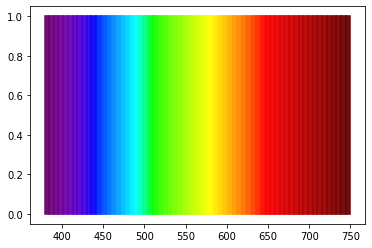

In [23]:
for i in numpy.arange(380,750,1):
    plot.plot([i,i],[0,1],color=wavelength_to_rgb(i))

Now, add the absorption lines for the sun (Fraunhofer lines). Again, this plot shows the absorption lines clearly, but the intensities are not correct, as for the sun the intensities vary with wavelength. 

In [24]:
Fraunhofer=[898.765,822.696,759.370,686.719,656.281,627.661,
             589.592,588.995,587.5618,546.073,527.039,518.362,
             517.270,516.891,516.733,495.761,486.134,466.814,438.355,
             434.047,430.790,430.774,410.175,396.847,393.366,382.044,
             358.121,336.112,302.108,299.444]

In [25]:
iF=[int(Fraunhofer[i]) for i in range(0,len(Fraunhofer))]

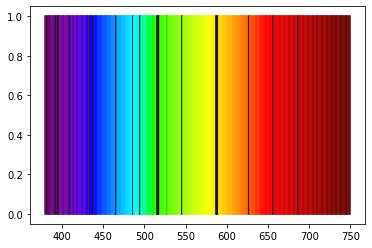

In [26]:
for i in numpy.arange(380,750,1):
    if i not in iF:
        plot.plot([i,i],[0,1],color=wavelength_to_rgb(i))
    else:
        plot.plot([i,i],[0,1],color='black')
        

## Wien's law

First, we define Planck's constant (in J s)

In [27]:
h=6.626e-34

Wien's displacement law, gives the wavelength (in micrometers or nanometers) of the photons which have the maximum intentsity per unit wavelength, it is:

$$ \lambda_{\mathrm{max}} = \frac{2898~{\mu}\mathrm{m}~\mathrm{K}}{T}\quad\mathrm{or}\quad \lambda_{\mathrm{max}} = \frac{2.898\times{10^{6}}~\mathrm{nm}~\mathrm{K}}{T}$$

The "surface" temperature of the sun:

In [28]:
Tsun=5772

And thus the wavelength (in nm) of the photons which have the largest flux is:

In [29]:
lambda_max=2.898e6/Tsun
print(lambda_max)

502.07900207900207


The speed of light in m/s is:

In [30]:
c=2.9979e8 

An alternative formulation of Wien's law gives the frequency (in Hz) which gives the 
maximum intensity per unit frequency: 
$$ \nu_{\mathrm{max}} = \frac{2.8214 k_B T}{h} $$

In [31]:
numax=2.8214*kB*Tsun/h
print(numax)

339330697744038.6


## Blackbody spectrum

The intensity as a function of frequency for a blackbody:
$$
J_{\nu}(T) d{\nu} = \frac{2 h \nu^3}{c^2} \frac{1}{e^{h \nu/k_B T}-1} d{\nu}
$$

Alternatively, the intensity as a function of wavelength:
$$
I_{\lambda}(T) d{\lambda} = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{h c/ \lambda k_B T}-1} d{\lambda}
$$

Let's plot the blackbody spectrum for the sun, $J_{\nu}$, first as a function of frequency:

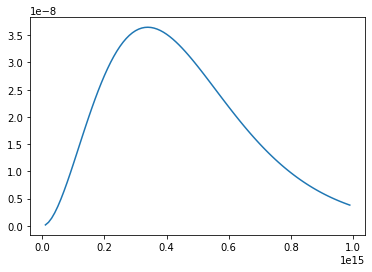

In [39]:
plot.plot([nu for nu in numpy.arange(1e13,1e15,1e13)],
          [2*h*nu**3/c**2/(exp(h*nu/kB/Tsun)-1.0)
           for nu in numpy.arange(1e13,1e15,1e13)])
plot.show()

Then as a function of wavelength, $I_{\lambda}$, (with lambda in meters):

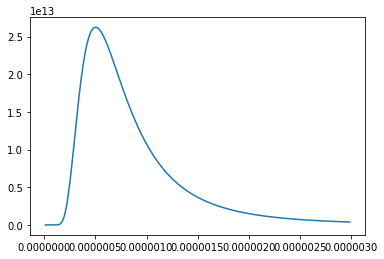

In [38]:
plot.plot([lam for lam in numpy.arange(1e-8,3e-6,1e-8)],
          [2*h*c**2/lam**5/(exp(h*c/lam/kB/Tsun)-1.0)
           for lam in numpy.arange(1e-8,3e-6,1e-8)])
plot.show()

Then as a function of wavelength, $I_\lambda$, (with lambda in nanometers and only the optical part of the spectrum):

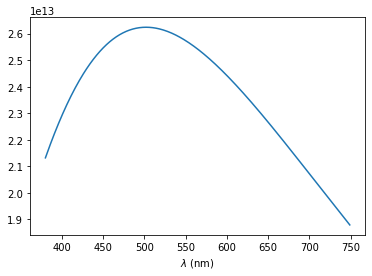

In [37]:
plot.plot([lam for lam in numpy.arange(380,750,1)],
          [2*h*c**2/(lam*1.0e-9)**5/(exp(h*c/(lam*1.0e-9)/kB/Tsun)-1.0)
           for lam in numpy.arange(380,750,1)])
plot.xlabel('$ \lambda~(\mathrm{nm}) $')
plot.show()

<font color="red">Task 4: Looking at the figure above, and comparing it to the images above, what color photons have the maximum value of $I_{\lambda}$? Place your answer in the empty cell below.</font>

## Color temperature

The visual color is actually a combination of the photons emitted in the blackbody spectrum. This is a plot of the color as a function of temperature. Compare with https://en.wikipedia.org/wiki/Black-body_radiation#/media/File:Color_temperature_black_body_800-12200K.svg

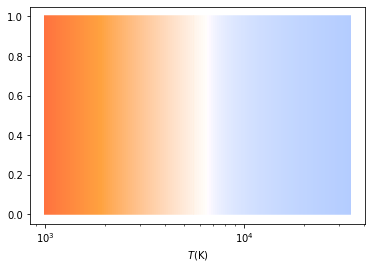

In [40]:
for i in numpy.arange(log10(1000),log10(34000),0.01):
    plot.semilogx([10**i,10**i],[0,1],color=convert_K_to_RGB(10**i))
plot.xlabel('$ T (\mathrm{K}) $')    
plot.show()

<font color="red">Task 5: Again looking at the figure above, what is the 
    color of the sun? Place your answer in the empty cell below.</font>

The intensity as a function of wavelength does not vary that much, 
but if we over emphasize the intensity and include the Fraunhofer lines, we get:

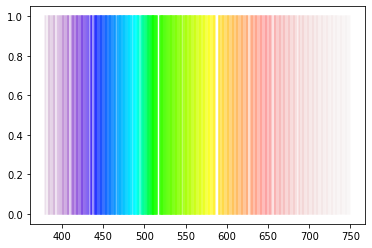

In [36]:
for lam in numpy.arange(380,750,1):
    if lam not in iF:
        # Compute J and normalize to the peak:
        Ilambda=2*h*c**2/(lam*1.0e-9)**5/(exp(h*c/(lam*1.0e-9)/kB/Tsun)-1.0)*3.81e-14
        col=wavelength_to_rgb(lam)
        plot.plot([lam,lam],[0,1],color=(col[0],col[1],col[2]),alpha=Ilambda**12)
